In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [266]:
X = pd.read_csv("menu.csv")
Y = X[['Category']]
X = X.drop('Category',1)
X = X.drop('Item', 1) # nie potrzebujemy bo patrzymy na kategorię
X = X.drop('Serving Size', 1) # nie wnika w szczególny sposób + może wprowadzać redundancję
X = X.drop('Calories', 1) # wynika ze składu
X = X.drop('Calories from Fat', 1) # wynika z tłuszczy
X = X.drop('Total Fat (% Daily Value)', 1) # ==Total Fat
X = X.drop('Saturated Fat (% Daily Value)', 1) # ==Saturated Fat
X = X.drop('Cholesterol (% Daily Value)', 1) # ==Cholesterol
X = X.drop('Sodium (% Daily Value)', 1) # ==Sodium
X = X.drop('Carbohydrates (% Daily Value)', 1) # ==Carbohydrates
X = X.drop('Dietary Fiber (% Daily Value)', 1) # ==Dietary Fiber

In [267]:
X

,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,17.0,9.0,0.5,45,280,80,1,64,12,15,0,40,8
256,23.0,12.0,1.0,55,380,106,1,85,15,20,0,50,10
257,11.0,6.0,0.0,30,190,53,1,43,8,10,0,25,6
258,32.0,15.0,1.0,60,400,114,2,103,21,20,0,60,6


In [269]:
X = pd.DataFrame(preprocessing.normalize(X,axis=0), columns=X.columns)
X

,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0.040226,0.038669,0.000000,0.156576,0.061209,0.034887,0.109764,0.004532,0.060077,0.022325,0.0,0.057446,0.079879
1,0.024755,0.023201,0.000000,0.015055,0.062842,0.033762,0.109764,0.004532,0.063611,0.013395,0.0,0.057446,0.042602
2,0.071170,0.061870,0.000000,0.027100,0.063658,0.032637,0.109764,0.003022,0.049475,0.017860,0.0,0.057446,0.053253
3,0.086641,0.077337,0.000000,0.171631,0.070187,0.033762,0.109764,0.003022,0.074213,0.033487,0.0,0.068935,0.079879
4,0.071170,0.061870,0.000000,0.030111,0.071819,0.033762,0.109764,0.003022,0.074213,0.013395,0.0,0.057446,0.053253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.052604,0.069603,0.065372,0.027100,0.022852,0.090032,0.027441,0.096690,0.042407,0.033487,0.0,0.091913,0.042602
256,0.071170,0.092805,0.130744,0.033122,0.031013,0.119292,0.027441,0.128417,0.053009,0.044649,0.0,0.114892,0.053253
257,0.034038,0.046402,0.000000,0.018066,0.015506,0.059646,0.027441,0.064964,0.028272,0.022325,0.0,0.057446,0.031952
258,0.099019,0.116006,0.130744,0.036133,0.032645,0.128296,0.054882,0.155611,0.074213,0.044649,0.0,0.137870,0.031952


In [270]:
Xcopy = X

Text(0.5, 1.0, 'Score k-means++')

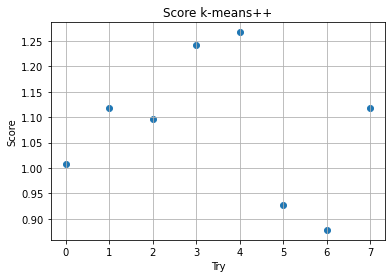

In [295]:
scores = np.zeros(8)
for i in range(2,10):
    kmeans = KMeans(n_clusters=5, init='k-means++', n_init=1).fit(Xcopy)
    labels = kmeans.labels_
    scores[i-2] = davies_bouldin_score(Xcopy, labels)

plt.scatter([i for i in range(0,8)],scores)
plt.ylabel("Score")
plt.xlabel("Try")
plt.grid(True)
plt.title("Score k-means++")

Text(0.5, 1.0, 'Score random')

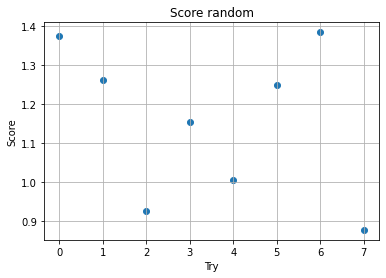

In [298]:
scores = np.zeros(8)
for i in range(2,10):
    kmeans = KMeans(n_clusters=5, init='random', n_init=1).fit(Xcopy)
    labels = kmeans.labels_
    scores[i-2] = davies_bouldin_score(Xcopy, labels)

plt.scatter([i for i in range(0,8)],scores)
plt.ylabel("Score")
plt.xlabel("Try")
plt.grid(True)
plt.title("Score random")

Text(0.5, 1.0, 'Score uniform')

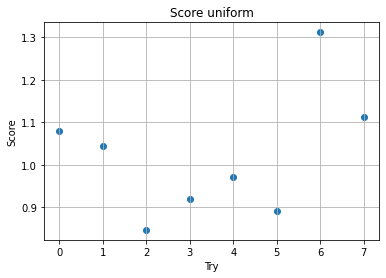

In [299]:
def kmeans_fully_random(X, k):
    return np.array([np.random.uniform(X.min(axis=0), X.max(axis=0)) for _ in range(k)])
    
scores = np.zeros(8)
for i in range(2,10):
    init = kmeans_fully_random(Xcopy, 5)
    kmeans = KMeans(n_clusters=5, init=init, n_init=1).fit(Xcopy)
    labels = kmeans.labels_
    scores[i-2] = davies_bouldin_score(Xcopy, labels)

plt.scatter([i for i in range(0,8)],scores)
plt.ylabel("Score")
plt.xlabel("Try")
plt.grid(True)
plt.title("Score uniform")

In [275]:
num_iters=10
num_clusters=12
iterations = 100
methods = ['k-means++', 'random', 'uniform']

def inside_of_kmeans():
    results = { method: [[] for _ in range(num_iters)] for method in methods }
    
    for _ in range(iterations):
        for method in methods:
            if method == "uniform":
                init = kmeans_fully_random(Xcopy, num_clusters)
            else:
                init = method

            means = KMeans(n_clusters=num_clusters, init=init, n_init=1, max_iter=1)
            labels = means.fit_predict(Xcopy)
            results[method][0].append(davies_bouldin_score(Xcopy, labels))
            tmp_centers = means.cluster_centers_
            for i in range(1, num_iters):
                means = KMeans (n_clusters=num_clusters, init=tmp_centers, n_init=1, max_iter=1)
                labels = means.fit_predict(Xcopy)
                results[method][i].append(davies_bouldin_score(Xcopy, labels))
                tmp_centers = means.cluster_centers_
    
    return results

In [276]:
result = inside_of_kmeans()

In [277]:
def plot_results(method):
    y = []
    error = []
    x = [i + 1 for i in range(10)]

    for r in result[method]:
        y.append(np.mean(r))
        error.append(np.std(r))

    plt.figure()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.grid(True)
    plt.errorbar(x, y, yerr=error, fmt='-o', color='darkorange', ecolor='dimgray', marker='s')
    plt.title(method)

    plt.show()

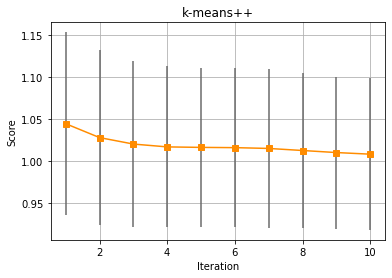

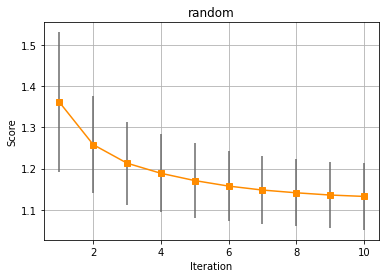

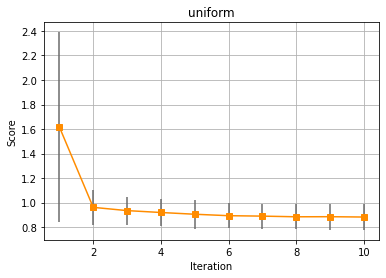

In [278]:
for method in methods:
    plot_results(method)

In [306]:
iterations = 100
results = [[] for _ in range(25)]

for _ in range(iterations):
    for k in range(4, 25):
        init = kmeans_fully_random(Xcopy, k)
        kmeans = KMeans(n_clusters=k, init=init, n_init=1).fit(Xcopy)
        labels = kmeans.labels_
        score = davies_bouldin_score(Xcopy, labels)

        results[k].append(score)
    

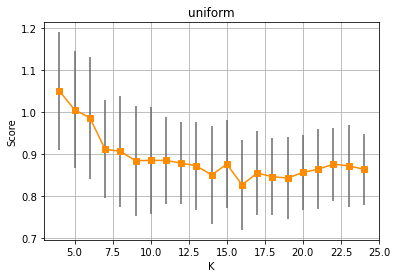

In [307]:
y = []
error = []
x = [i for i in range(4, 25)]

for k, r in enumerate(results):
    if k >= 4:
        y.append(np.mean(r))
        error.append(np.std(r))


plt.figure()
plt.xlabel("K")
plt.ylabel("Score")
plt.grid(True)
plt.errorbar(x, y, yerr=error, fmt='-o', color='darkorange', ecolor='dimgray', marker='s')
plt.title('uniform')

plt.show()

In [309]:
kmeans = KMeans(n_clusters=14, init=kmeans_fully_random(Xcopy, 14), n_init=1)
x_km = kmeans.fit(Xcopy)
y_km = kmeans.fit_predict(Xcopy)

In [310]:
cluster_centers = kmeans.cluster_centers_

In [311]:
cluster_centers

array([[ 8.49221561e-03,  1.01397642e-02,  1.73472348e-17,
         4.01477142e-03,  4.67912361e-03,  1.66809277e-02,
         6.09801444e-03,  1.76258171e-02,  4.24073279e-03,
         5.40751395e-03,  4.63621803e-03,  5.00416476e-03,
         3.78684767e-03],
       [ 8.62286509e-02,  9.12578777e-02,  1.69967317e-01,
         8.19013370e-02,  9.30927965e-02,  4.63664768e-02,
         7.50055777e-02,  1.21869935e-02,  1.04840338e-01,
         2.06874616e-02,  1.67502071e-02,  5.74457689e-02,
         1.31356279e-01],
       [ 1.85659775e-01,  1.54674369e-01,  0.00000000e+00,
         3.46274035e-01,  1.84444524e-01,  1.30546391e-01,
         1.92087455e-01,  2.56833335e-02,  1.27221984e-01,
         3.34868983e-02,  4.48666261e-03,  6.89349227e-02,
         2.13010182e-01],
       [ 3.71319549e-02,  3.48017330e-02,  0.00000000e+00,
         3.61329428e-02,  5.03277831e-02,  1.50053323e-02,
         6.40291517e-02,  6.54673206e-03,  7.42128238e-02,
         2.82778253e-01,  6.35610536e

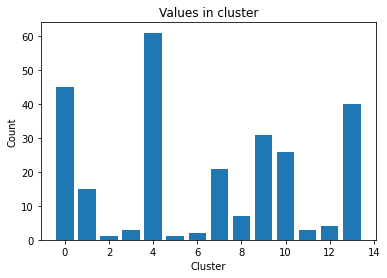

In [314]:
from collections import Counter
w = Counter(y_km)
plt
plt.bar(w.keys(), w.values())
plt.title("Values in cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

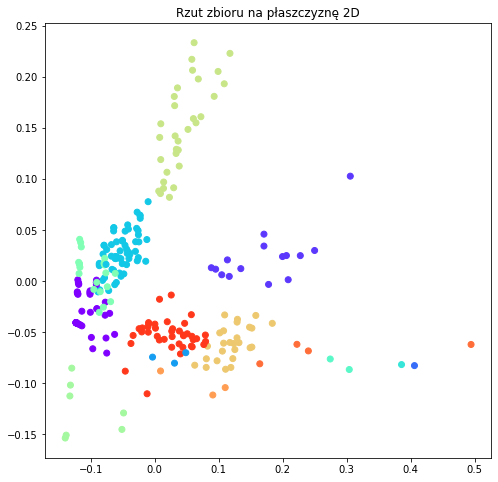

In [319]:
from sklearn.decomposition import PCA

pca_2D = PCA(2)
X_2D = pca_2D.fit_transform(Xcopy)

plt.figure(figsize=(8,8))
colors = pd.Categorical(Y[col], categories=Y[col].unique()).codes
cmap = cm.rainbow
norm = Normalize(vmin=0, vmax=14)
plt.scatter(X_2D[:,0], X_2D[:,1], c=cmap(norm(y_km))) 


plt.title("Rzut zbioru na płaszczyznę 2D")
plt.show() 

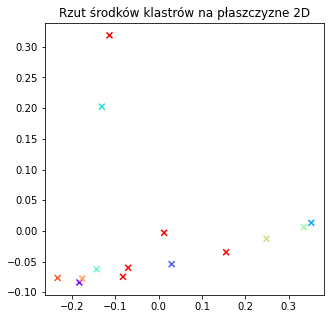

In [318]:
pca_2D_cc = PCA(2)
X_2D_cc = pca_2D.fit_transform(cluster_centers)
plt.figure(figsize=(5,5))
plt.scatter(X_2D_cc[:,0], X_2D_cc[:,1], c=cmap(norm(np.unique([int(i) for i in range(14)]))), marker="x") 
plt.title("Rzut środków klastrów na płaszczyzne 2D")
plt.show() 

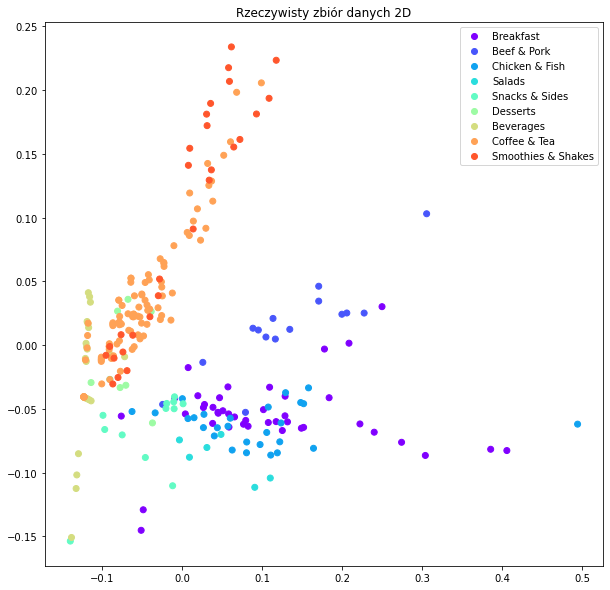

In [317]:
col = Y.columns[0]
categories_numbers = pd.Categorical(Y[col], categories=Y[col].unique()).codes

pca_2D = PCA(2)
X_2D = pca_2D.fit_transform(Xcopy)

cmap = cm.rainbow
norm = Normalize(vmin=0, vmax=9)

plt.figure(figsize=(10,10))
plt.scatter(X_2D[:,0], X_2D[:,1], c=cmap(norm(colors)))
markers = [plt.Line2D([0,0],[0,0],color=cmap(norm(color)), marker='o', linestyle='') for color in np.unique(colors)]
plt.legend(markers, Y[col].unique(), numpoints=1)
plt.title("Rzeczywisty zbiór danych 2D")
plt.set_cmap('jet')
plt.show() 